<a href="https://colab.research.google.com/github/D-Soto/Project-1/blob/main/Datafix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
filename = '/content/drive/MyDrive/Colab Notebooks/Project/sales_predictions.csv'
dirty_df = pd.read_csv(filename)
dirty_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
less_df = dirty_df.dropna()
less_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
SaleFilter = less_df.groupby(['Item_Type'])[['Item_Outlet_Sales']].mean()
SaleFilter

,Item_Outlet_Sales
Item_Type,
Baking Goods,2046.798187
Breads,2389.702474
Breakfast,2203.166638
Canned,2205.210750
Dairy,2337.420556
Frozen Foods,2222.011887
Fruits and Vegetables,2312.703005
Hard Drinks,2233.275299
Health and Hygiene,2138.071282


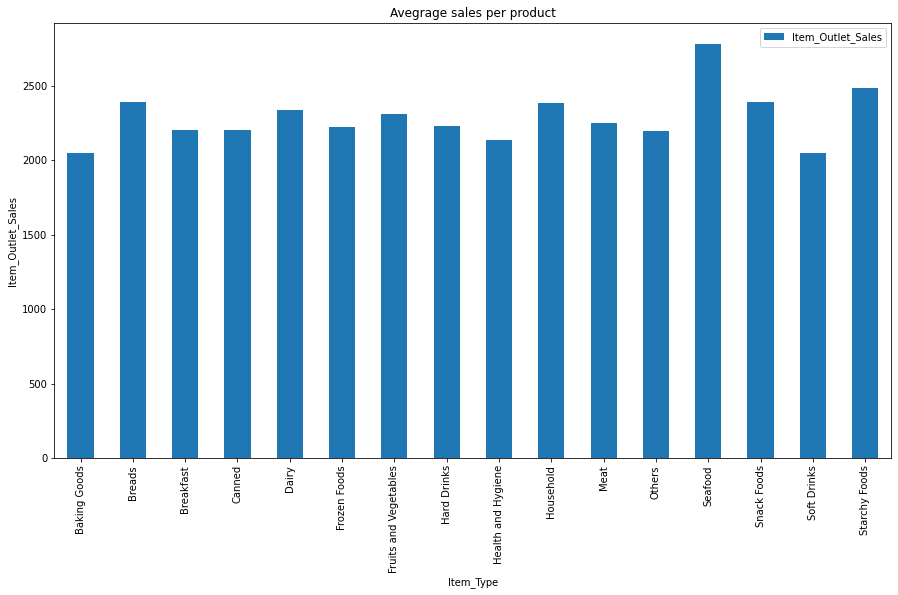

In [ ]:
SaleFilter.plot(kind='bar', figsize=(15,8))
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Avegrage sales per product')
plt.legend(loc='upper right',)
plt.show()

In [ ]:
StoreFilter = less_df.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].mean()
StoreFilter

Outlet_Location_Type  Outlet_Type      
Tier 1                Supermarket Type1    2313.099451
Tier 2                Supermarket Type1    2438.841866
Tier 3                Supermarket Type1    2298.995256
                      Supermarket Type2    1995.498739
Name: Item_Outlet_Sales, dtype: float64

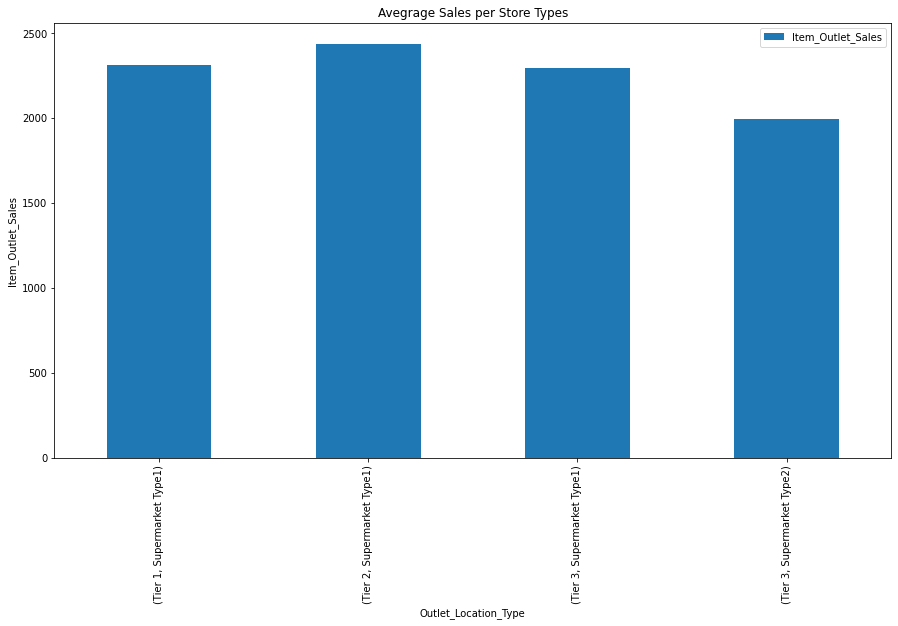

In [ ]:
StoreFilter.plot(kind='bar', figsize=(15,8))
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Avegrage Sales per Store Types')
plt.legend(loc='upper right',)
plt.show()

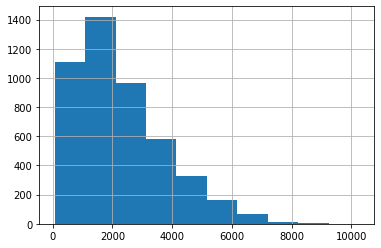

In [ ]:
less_df['Item_Outlet_Sales'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


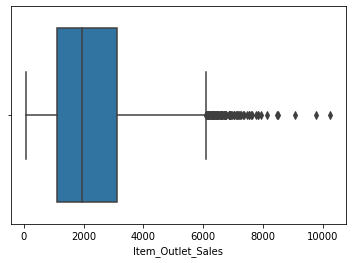

In [ ]:
sns.boxplot(less_df['Item_Outlet_Sales'])

In [ ]:
X = less_df[['Item_Weight',	'Item_Visibility','Item_MRP',	'Outlet_Establishment_Year']]
Y = less_df['Item_Outlet_Sales']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)

In [ ]:
lr_tts = LinearRegression()
lr_tts.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_tts.score(X_train, Y_train)

0.45813437949678565

In [ ]:
lr_tts.score(X_test, Y_test)

0.4785293801921343